In [1]:
!apt-get install -y libcairo2-dev
!pip install pycairo
!pip install python-igraph
from igraph import Graph
from igraph import plot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev libglib2.0-dev
  libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
The following packages will be upgraded:
  libblkid1 libmount1
2 upgraded, 15 newly installed, 0 to remove and 47 not upgraded.
Need to get 4,068 kB of archives.
Afte

In [2]:
# Criação de um gráfico direcionado com pesos entre as arestas
grafo = Graph(edges = [(0,2),(0,1),(1,4),(1,5),(2,3),(6,7),(3,7),(4,7),(5,6)],
                       directed = True)
grafo.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
grafo.es['weight'] = [2,1,2,1,2,1,3,1]

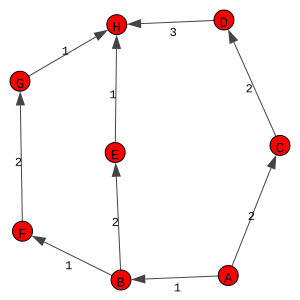

In [3]:
# Visualização dos resultados
plot(grafo, bbox = (0,0,300,300), edge_label = grafo.es['weight'])

In [4]:
# Menor caminho entre A - H (retorna os vértices)
caminho_vertice = grafo.get_shortest_paths(0,7, output = 'vpath')
caminho_vertice

[[0, 1, 4, 7]]

In [5]:
# Retorna as arestas que ligam os dois vértices
caminho_aresta = grafo.get_shortest_paths(0,7, output = 'epath')
caminho_aresta

[[1, 2, 7]]

In [6]:
# Mostra o ID dos vértices que fazem parte do caminho
caminho_aresta_id = []
for n in caminho_aresta[0]:
    caminho_aresta_id.append(n)
caminho_aresta_id

[1, 2, 7]

In [7]:
# Mostra o nome dos vértices que fazem parte do caminho
caminho_nome_vertices = []
for n in caminho_vertice[0]:
    print(grafo.vs[n]['label'])
    caminho_nome_vertices.append(grafo.vs[n]['label'])
caminho_nome_vertices

A
B
E
H


['A', 'B', 'E', 'H']

In [8]:
# Colorir os vértices do caminho
for v in grafo.vs:
    #print(v)
    if v['label'] in caminho_nome_vertices:
        v['color'] = 'green'
    else:
        v['color'] = 'gray'

In [9]:
# Colorir as arestas do caminho
for e in grafo.es:
    #print(e)
    if e.index in caminho_aresta_id:
        e['color'] = 'green'
    else:
        e['color'] = 'gray'

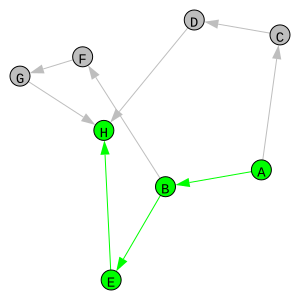

In [10]:
plot(grafo, bbox=(0,0,300,300))